### Цель работы: 
научиться применять разработанный пайплайн для тиражирования кода с целью решения задачи полиномиальной регрессии.

### Основные задачи:
- получение навыков рефакторинга кода в проектах машинного обучения;
- изучение поведения модели полиномиальной регрессии при изменении степени полинома;
- исследование свойств набора данных в рамках задачи полиномиальной регрессии.

## Описание данных

Пусть у нас имеется некоторый набор данных `sales.csv` о продажах квартир:

- **SalePrice** (цена продажи, *зависимая переменная*).
- **GrLivArea** (наземная жилая зона).
- **OverallQuality** (общее качество).
- **GarageArea** (территория гаража).
- **SaleCondition** (условия сделки).


### 1. Импорт библиотек

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

### 2. Загрузка данных

In [57]:
df = pd.read_csv("sales.csv")
df

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal
...,...,...,...,...,...,...
1455,175000,1647,460,6,Pave,Normal
1456,210000,2073,500,6,Pave,Normal
1457,266500,2340,252,7,Pave,Normal
1458,142125,1078,240,5,Pave,Normal


### 3. Первичный анализ

1. Проведем анализ данных, посмотрим на индивидуальные графики зависимости целевой функции и отдельной переменной. Удобно построить sns.pairplot.
2. Закодируем категориальные признаки (с помощью pd.get_dummies
3. Сделаем предварительные выводы.

Изучая исходные данные, можно сделать вывод, что мы имеем данные о продажах квартир. Нам доступны сведения о характеристиках каждой квартиры. Стоит отметить, что категориальных признаков всего 2 - Street и SaleCondition,которые отображают данные о покрытии придомовой территории и условиях сделки. Остальные признаки - количественные. В дальнейших шагах поставим себе цель - предсказать стоимость квартиры, т.е. SalePrice, по существующим признакам. 

1. Построим индивидуальные графики зависимости целевой функции и отдельной переменной:

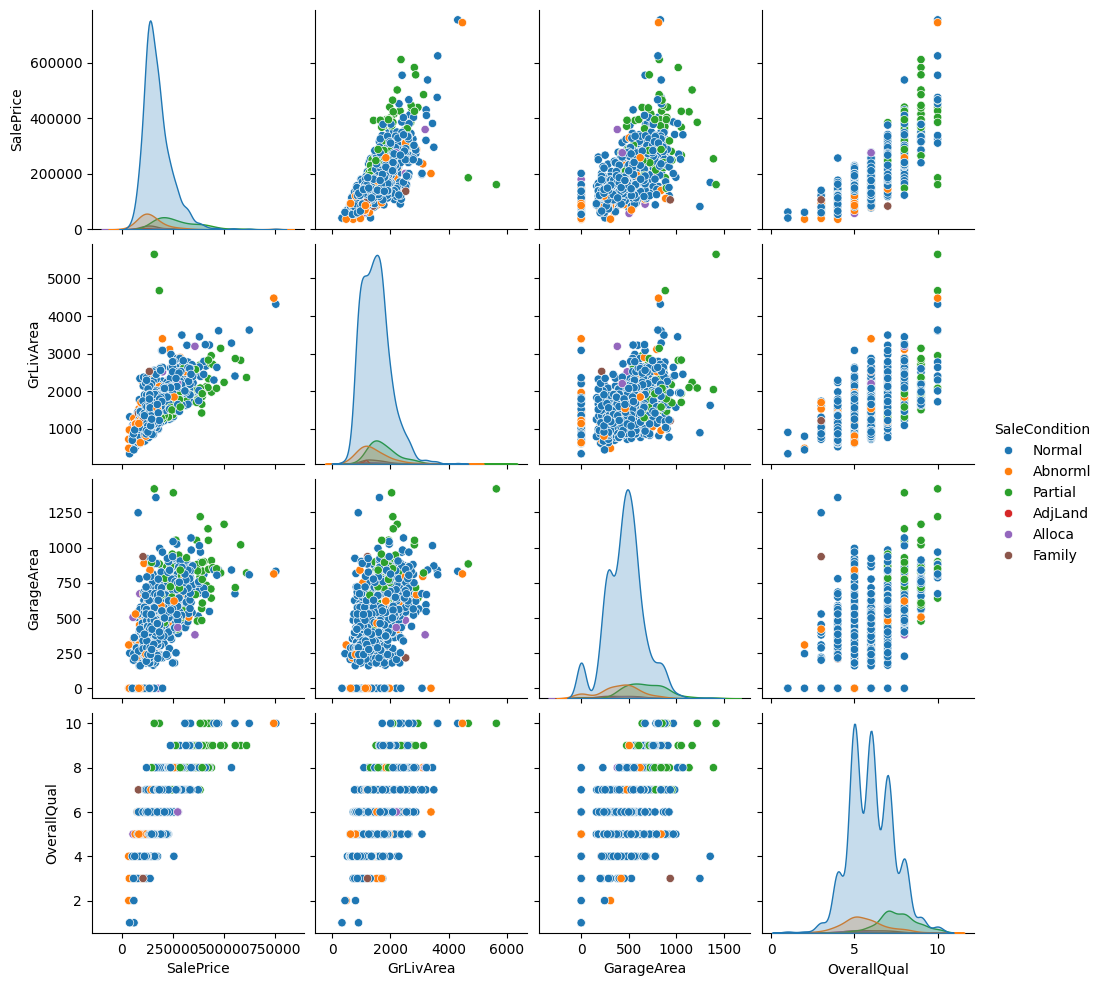

In [31]:
sns.pairplot(df[['SalePrice', 'GrLivArea', 'GarageArea', 'OverallQual', 'Street', 'SaleCondition']],hue="SaleCondition")
plt.show()

Обратим внимание на графики рассеяния в столбце SalesPrice. По ним можно сделать вывод о том, что данные признаки имеют линейную зависимость друг от друга, а значит можно использовать Линейную регрессию для прогноза данных. При этом возникают выбросы стоимости в виду того, что целевая переменная SalePrice имеет очень большие значения.

2. Закодируем категориальные признаки (с помощью pd.get_dummies).

In [58]:
import pandas as pd

df_encoded = pd.get_dummies(df, columns=['Street', 'SaleCondition'])

# df_encoded будет содержать закодированные категориальные признаки
df_encoded

,SalePrice,GrLivArea,GarageArea,OverallQual,Street_Grvl,Street_Pave,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,1710,548,7,False,True,False,False,False,False,True,False
1,181500,1262,460,6,False,True,False,False,False,False,True,False
2,223500,1786,608,7,False,True,False,False,False,False,True,False
3,140000,1717,642,7,False,True,True,False,False,False,False,False
4,250000,2198,836,8,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,1647,460,6,False,True,False,False,False,False,True,False
1456,210000,2073,500,6,False,True,False,False,False,False,True,False
1457,266500,2340,252,7,False,True,False,False,False,False,True,False
1458,142125,1078,240,5,False,True,False,False,False,False,True,False


В данном случае здесь можно создать дополнительные переменные из имеющихся, так как эти переменные добавят данных для создания модели и сделают ее более точной за счет новых переменных для построения.
Проверим выбросы распределения цен:

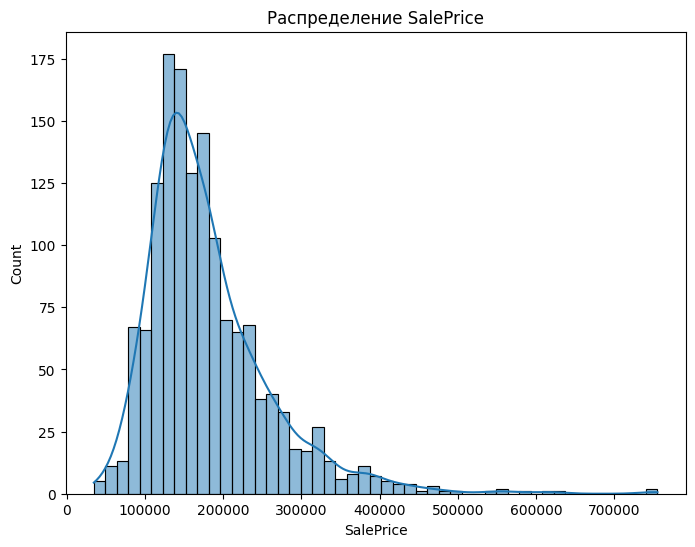

Минимальное значение SalePrice: 34900
Максимальное значение SalePrice: 755000


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предположим, что df_encoded содержит наши данные с закодированными категориальными признаками
df_linear = df_encoded.copy()
y = df_linear['SalePrice']

# Проверяем распределение SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True)
plt.title('Распределение SalePrice')
plt.show()

# Проверяем диапазон значений SalePrice
print(f'Минимальное значение SalePrice: {y.min()}')
print(f'Максимальное значение SalePrice: {y.max()}')


Гистограмма распределения SalePrice показывает, что данные имеют правосторонне асимметричное распределение, с пиком в районе более низких цен и длинным "хвостом" в сторону более высоких цен. Также данная характеристика имеет довольно большой диапазон значений. Попробуем логарифмировать целевую переменную SalePrice, чтобы привести распределение к более симметричному виду:

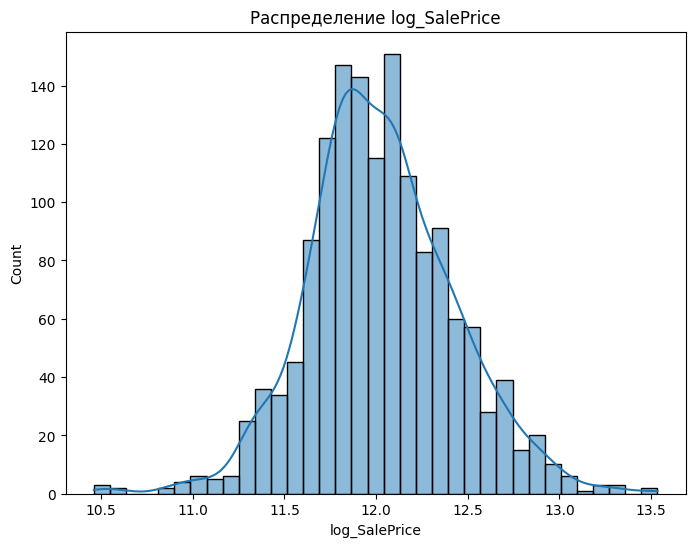

Минимальное значение log_SalePrice: 10.460242108190519
Максимальное значение log_SalePrice: 13.534473028231162


In [60]:
df_linear = df_encoded.copy()

# Логарифмируем SalePrice
df_linear['log_SalePrice'] = np.log(df_linear['SalePrice'])

# Проверяем распределение log_SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(df_linear['log_SalePrice'], kde=True)
plt.title('Распределение log_SalePrice')
plt.show()

# Проверяем диапазон значений log_SalePrice
print(f'Минимальное значение log_SalePrice: {df_linear["log_SalePrice"].min()}')
print(f'Максимальное значение log_SalePrice: {df_linear["log_SalePrice"].max()}')


Распределение log_SalePrice выглядит более симметричным, чем исходное распределение SalePrice, а также диапазон значений стал значительно меньше.

### 4. Разделение на обучающую и тестовую выборки

Будем рассматривать зависимость между двумя признаками - log_SalePrice и OverallQual, так как признак OverallQual больше подойдет нам для задачи полиномиальной регрессии, так как имеет фиксированное количество значений схожее со структурой временного ряда

Для лучшей визуализации графика мы возьмем первые 5 строк датасета и будем рассматривать модель только на этих строках.

In [99]:
x = df_linear[['log_SalePrice']].head(5)
y = df_linear['OverallQual'].head(5)     

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

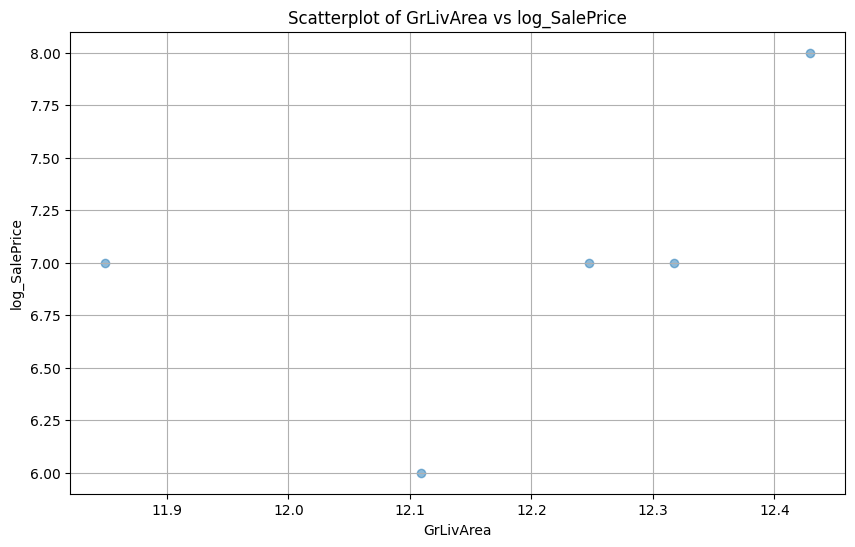

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Scatterplot of GrLivArea vs log_SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('log_SalePrice')
plt.grid(True)
plt.show()

### 5. Обучение модели линейной регрессии

Дополнительно можно взглянуть на коэффициенты и смещение обученной модели.

In [114]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

### 6. Обучение модели полиномиальной регрессии


In [115]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(x)
poly_reg.fit(X_poly, y)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

### 7. Получение предсказаний для обучающей и тестовой выборок

#### Результаты линейной регрессии

[-2.14298775] [54222.40267447]


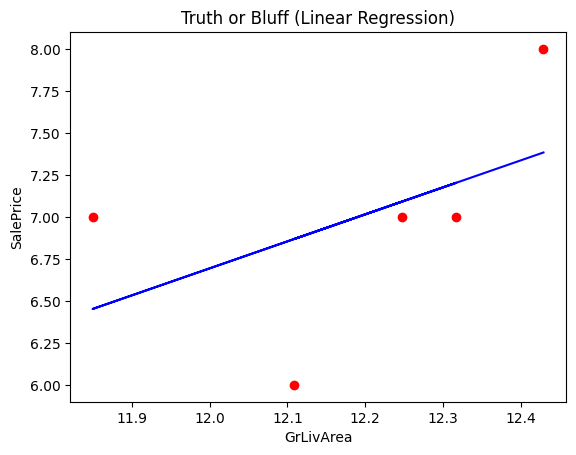

In [116]:
y_pred_lin = lin_reg.predict([[6.5]])
y_pred_poly = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print(y_pred_lin, y_pred_poly)
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

#### Результаты полиномиальной модели

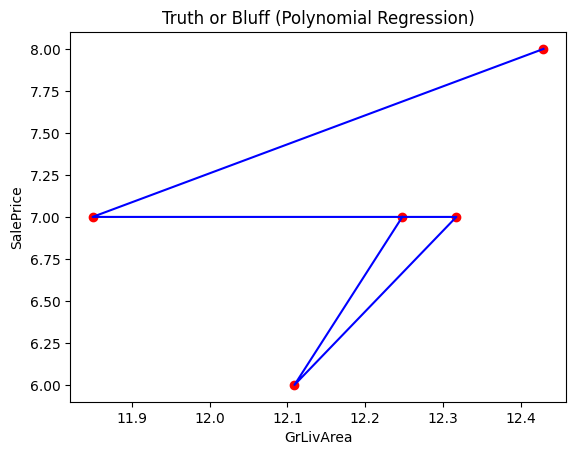

In [117]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

C:\Users\nastya-pls\AppData\Local\Temp\ipykernel_18276\2539357733.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(x), max(x), 0.1).reshape(-1, 1)


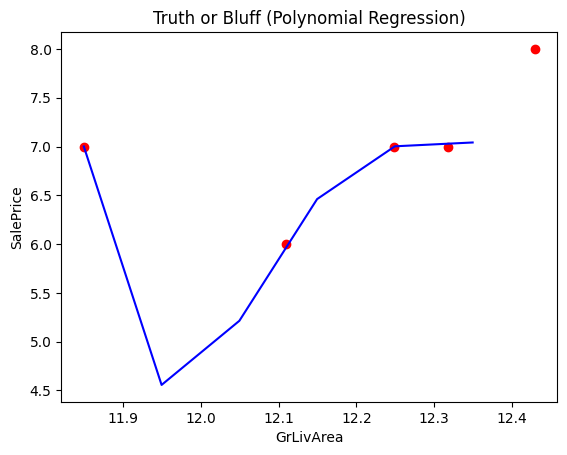

In [118]:
# Преобразуем в массив
x = df_linear[['log_SalePrice']].head(5).values  
y = df_linear['OverallQual'].head(5).values     

X_grid = np.arange(min(x), max(x), 0.1).reshape(-1, 1)  

poly_reg = PolynomialFeatures(degree=10)  
lin_reg_2 = LinearRegression()
lin_reg_2.fit(poly_reg.fit_transform(x), y)

# Визуализация
plt.scatter(x, y, color='red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()


Рассмотрим, как меняется модель при изменении степени полинома:

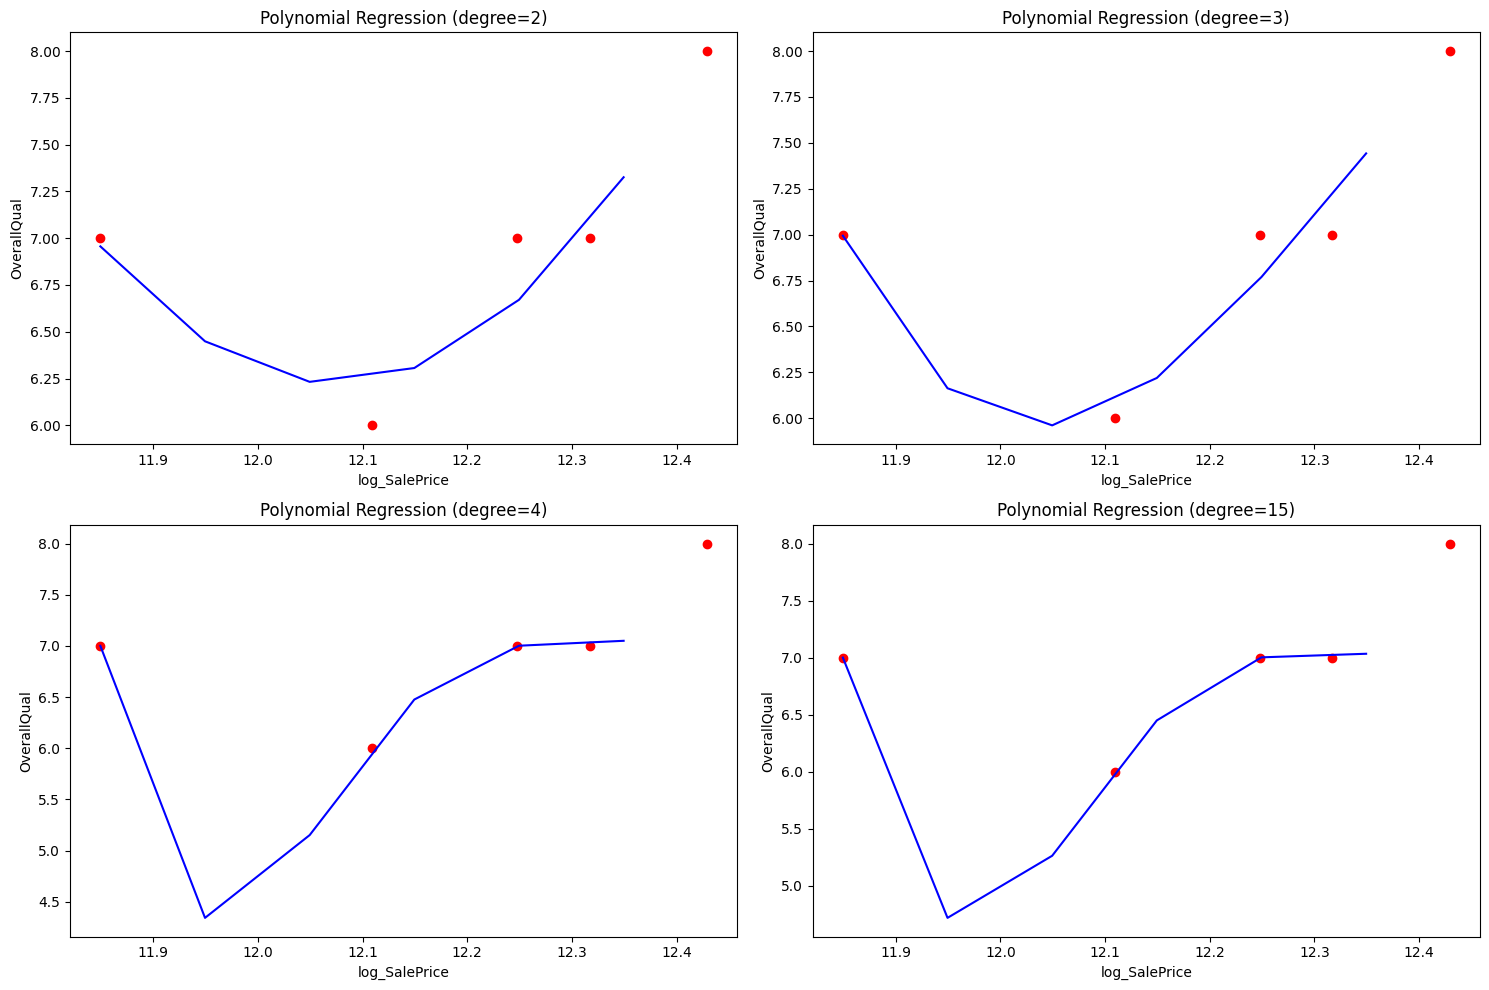

In [120]:
degrees = [2, 3, 4, 15]

plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees):
    plt.subplot(2, 2, i + 1)  
    poly_reg = PolynomialFeatures(degree=degree)  
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(poly_reg.fit_transform(x), y)

    # Визуализация
    plt.scatter(x, y, color='red')
    plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color='blue')
    plt.title(f'Polynomial Regression (degree={degree})')
    plt.xlabel('log_SalePrice')
    plt.ylabel('OverallQual')

plt.tight_layout()  
plt.show()

При анализе данных графиков мы можем отметить, что при 5 выбранных данных тяжело сразу выбрать какая модель лучше подходит в данной задаче.

Аналитически лучше справляется модель со степнью = 3, так как она лучше всего учитывает тренд данных, хоть и имеет некоторую погрешность. Однако, остальные модели с увеличением степени лучше аппроксимируют исходные данные, но не следуют тренду данных, что добавляет некоторую сложность при дальнейшем прогнозе данных

Для описания будущих прогнозов я бы воспользовалась 2 моделью со степенью = 3, так как, по моему мнению, мы можем допустить некоторую погрешность в прогнозе, но нам необходимо придерживаться тренда данных. А также для дальнейшей задачи прогноза лучше рассмотреть больше данных